In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import MaxNLocator

## Cargado de datos

In [24]:
task_ids = ['task_1816655']
todos_los_datos = []

for task_id in task_ids:
    for generacion in range(1, 46):
        ruta_archivo = f'resultados/{task_id}/resultados_generacion_{generacion}.csv'
        if os.path.exists(ruta_archivo):
            datos = pd.read_csv(ruta_archivo)
            datos['generacion'] = generacion
            todos_los_datos.append(datos)
        else:
            print(f'Archivo no encontrado: {ruta_archivo}')

# Unir todos los DataFrames en uno solo
df_total = pd.concat(todos_los_datos, ignore_index=True)

In [25]:
df_total

,D,A,B,x,y,beta_1,beta_2,beta_3,beta_4,beta_5,gamma_1,gamma_2,gamma_3,gamma_4,gamma_5,fitness,generacion
0,9.065351,0.000140,1.652183,437.0,561.0,0.717125,1.647549,0.914091,0.832711,0.318041,0.516057,0.412230,0.131683,0.445915,0.286237,0.754569,1
1,81.846016,0.000466,7.346697,371.0,565.0,0.100000,0.738844,0.143099,0.172419,0.922672,0.090000,0.180287,0.128789,0.155177,0.239299,0.828189,1
2,59.102909,0.000128,18.517599,419.0,526.0,1.343940,1.396184,0.236557,0.971037,1.536793,1.089676,0.327183,0.212901,0.282107,0.933428,0.670459,1
3,85.514755,0.000225,20.471083,404.0,566.0,1.638329,0.242402,1.716080,1.449326,0.790157,0.957640,0.218162,0.243090,0.791833,0.320786,0.781658,1
4,75.790405,0.000290,19.221537,381.0,554.0,0.100000,1.898761,1.853686,1.690428,0.551073,0.090000,0.637717,1.497621,0.234053,0.194706,0.837281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,14.043102,0.000000,16.309139,362.0,614.0,0.720217,0.100000,0.100000,0.222468,1.951942,0.100000,0.090000,0.090000,0.200222,0.419382,0.700065,45
449996,6.892499,0.000151,15.291442,414.0,586.0,0.754975,0.457460,0.496045,0.540650,0.531125,0.277776,0.090000,0.336753,0.364673,0.449903,0.431742,45
449997,19.802135,0.000105,8.818535,392.0,592.0,0.710637,0.100000,0.377768,1.284616,1.688981,0.316671,0.090000,0.237460,0.090000,0.090000,0.158756,45
449998,17.372471,0.000134,10.162973,432.0,587.0,0.657295,0.830113,0.976177,1.364014,1.799818,0.100000,0.100000,0.090000,0.644908,0.100000,0.356910,45


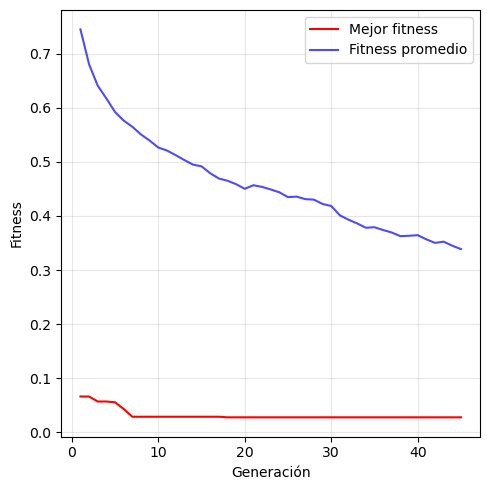

In [26]:
# Visualizaciones de los resultados del algoritmo genético

# 1. Evolución del fitness a lo largo de las generaciones
mejor_fitness = df_total.groupby('generacion')['fitness'].min()
fitness_promedio = df_total.groupby('generacion')['fitness'].mean()

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(mejor_fitness.index, mejor_fitness.values, '-', color='red', label='Mejor fitness')
ax.plot(fitness_promedio.index, fitness_promedio.values, '-', color='blue', alpha=0.7, label='Fitness promedio')
ax.set_xlabel('Generación')
ax.set_ylabel('Fitness')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()

In [27]:
# Ordenar por fitness (menor es mejor)
df_sorted = df_total.sort_values("fitness", ascending=True)

# Eliminar duplicados según las columnas que definen un individuo
# (acá pongo todas las que listaste, podés ajustar si alguna no hace falta)
df_unique = df_sorted.drop_duplicates(
    subset=[
        "D", "A", "B",
        "beta_1", "beta_2", "beta_3", "beta_4", "beta_5",
        "gamma_1", "gamma_2", "gamma_3", "gamma_4", "gamma_5",
        "x", "y"
    ],
    keep="first"
)

# Quedarse con los 10 mejores
top10 = df_unique.head(10)

# Mostrar
print("\n🏆 TOP 10 INDIVIDUOS ENCONTRADOS:")
for i, row in top10.iterrows():
    print(f"\n#{i+1}")
    print(f"   Generación: {row['generacion']}")
    print(f"   D = {row['D']}")
    print(f"   A = {row['A']}")
    print(f"   B = {row['B']}")
    print(f"   beta_1 = {row['beta_1']}")
    print(f"   beta_2 = {row['beta_2']}")
    print(f"   beta_3 = {row['beta_3']}")
    print(f"   beta_4 = {row['beta_4']}")
    print(f"   beta_5 = {row['beta_5']}")
    print(f"   gamma_1 = {row['gamma_1']}")
    print(f"   gamma_2 = {row['gamma_2']}")
    print(f"   gamma_3 = {row['gamma_3']}")
    print(f"   gamma_4 = {row['gamma_4']}")
    print(f"   gamma_5 = {row['gamma_5']}")
    print(f"   Punto de ignición: ({row['x']}, {row['y']})")
    print(f"   Fitness = {row['fitness']}")



🏆 TOP 10 INDIVIDUOS ENCONTRADOS:

#274800
   Generación: 28.0
   D = 23.248210906982425
   A = 0.0001171930416603
   B = 16.2496337890625
   beta_1 = 0.8039076
   beta_2 = 1.047832
   beta_3 = 1.132991
   beta_4 = 0.91779375
   beta_5 = 1.2309612
   gamma_1 = 0.4849485
   gamma_2 = 0.38020054
   gamma_3 = 1.0196918
   gamma_4 = 0.3121316
   gamma_5 = 0.13555631
   Punto de ignición: (403.0, 604.0)
   Fitness = 0.0279280119358448

#139559
   Generación: 14.0
   D = 23.224929809570312
   A = 0.0001171930416603
   B = 16.754838943481445
   beta_1 = 0.8039076
   beta_2 = 1.047832
   beta_3 = 1.132991
   beta_4 = 0.91779375
   beta_5 = 1.3904237
   gamma_1 = 0.4849485
   gamma_2 = 0.38020054
   gamma_3 = 1.0196918
   gamma_4 = 0.8171605
   gamma_5 = 0.16401595
   Punto de ignición: (403.0, 604.0)
   Fitness = 0.029000372995151

#228576
   Generación: 23.0
   D = 19.92544937133789
   A = 0.0001171930416603
   B = 15.553504943847656
   beta_1 = 0.5805893
   beta_2 = 0.7029813
   beta_3 = 1.6

## Análisis de la última generación
### Análisis específico de los mejores resultados obtenidos

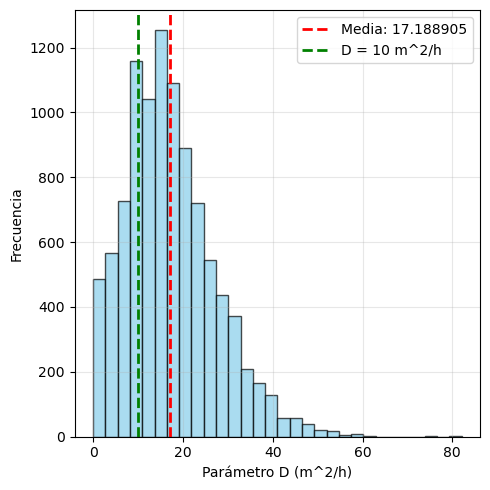

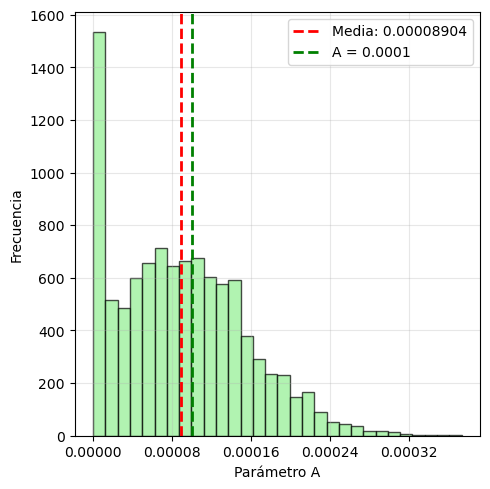

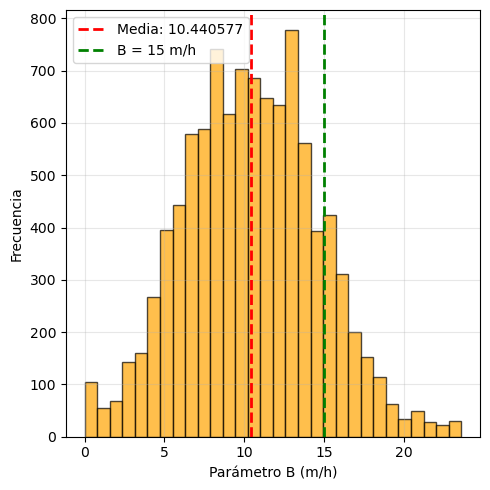

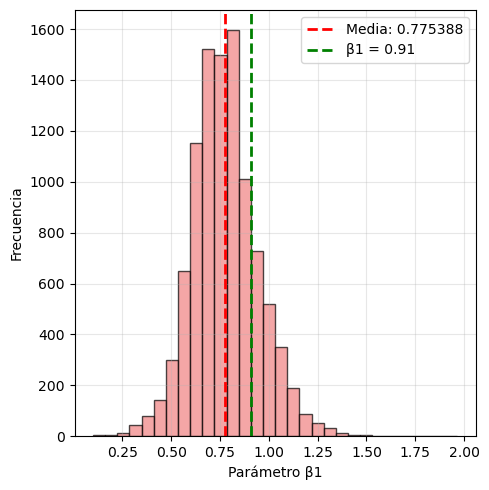

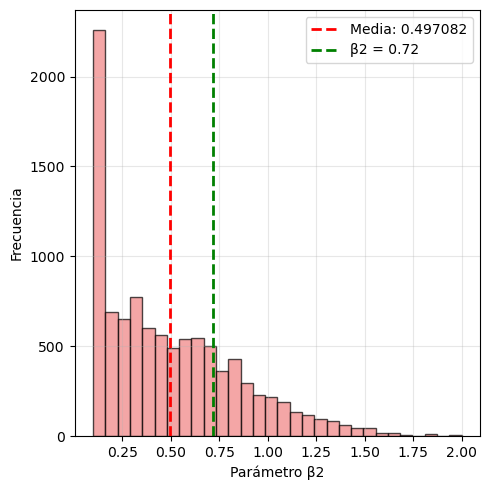

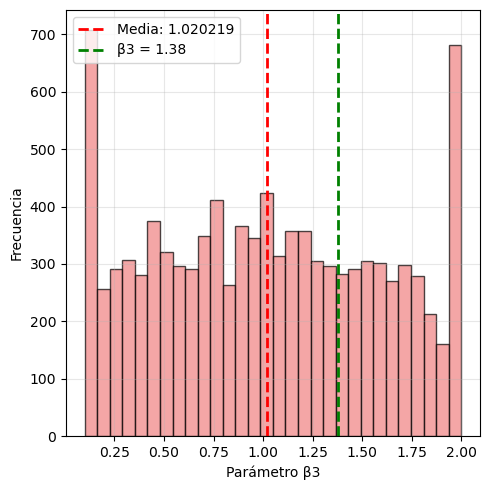

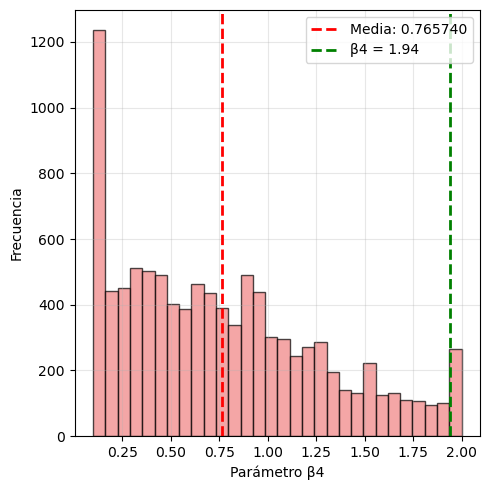

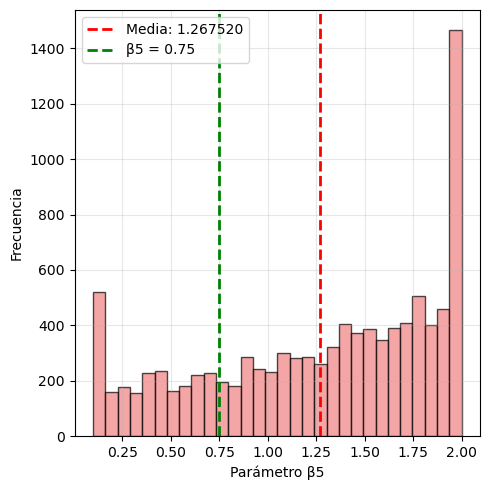

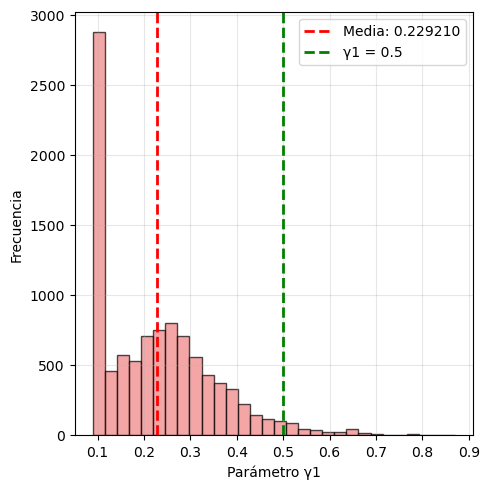

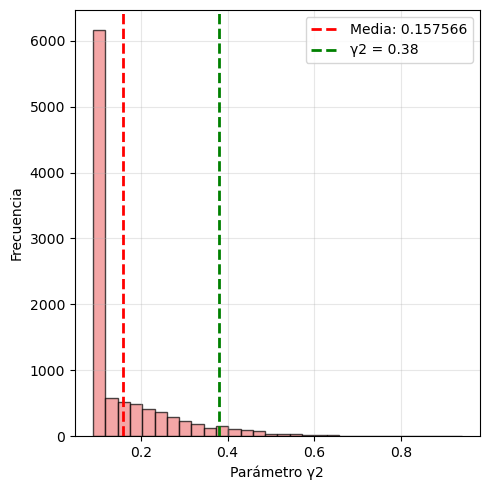

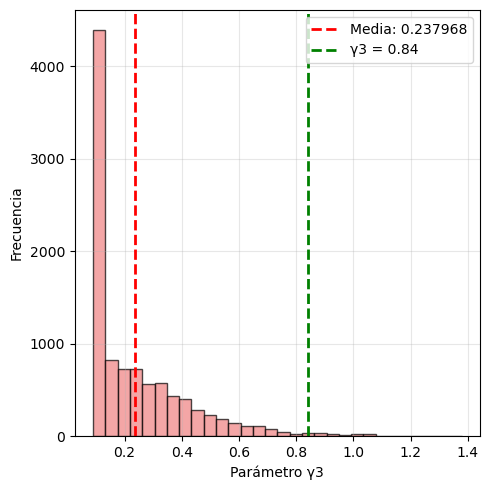

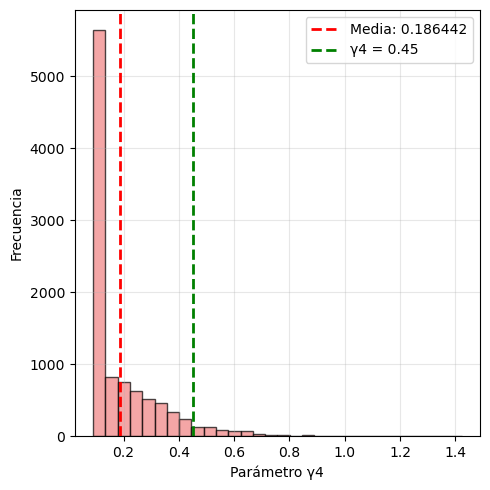

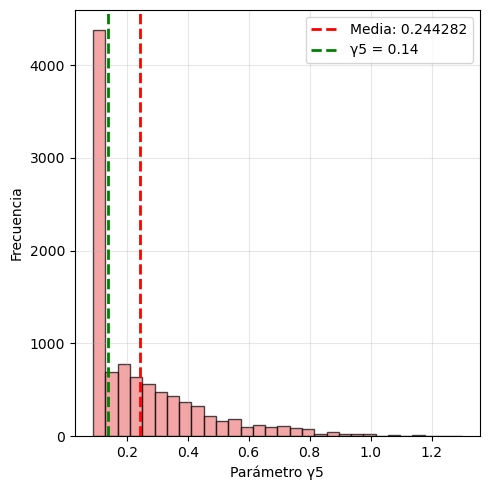

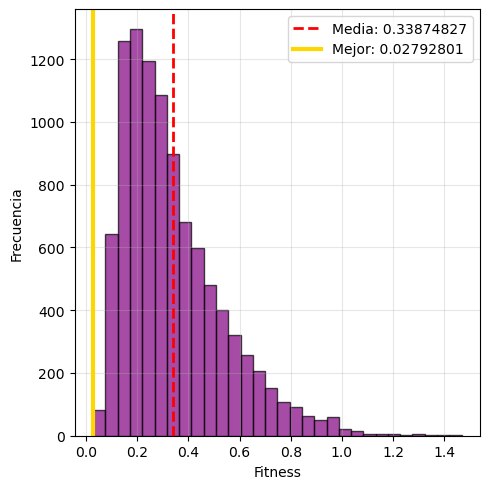

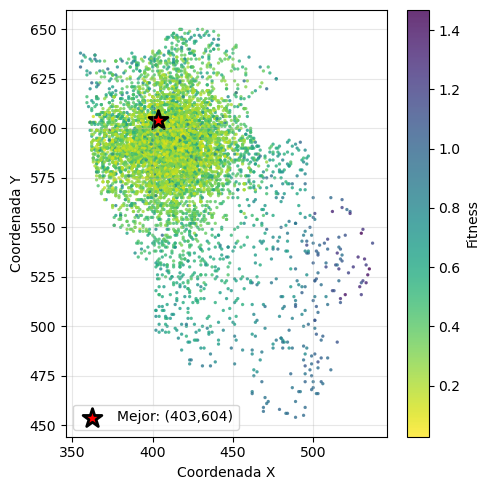

In [28]:
# Visualizaciones específicas para la ÚLTIMA GENERACIÓN

# Detectar automáticamente la última generación
ultima_generacion = df_total['generacion'].max()
gen_ultima = df_total[df_total['generacion'] == ultima_generacion].copy()

n_bins = 30

# Seleccionar los mejores 1000 individuos de la última generación (fitness más pequeño)
# gen_ultima = gen_ultima.nsmallest(100, 'fitness')

# 1. Distribución del parámetro D en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['D'], bins=n_bins, color='skyblue', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['D'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["D"].mean():.6f}')
plt.axvline(10, color='green', linestyle='--', linewidth=2,
                  label=f'D = {10} m^2/h')
ax.set_xlabel('Parámetro D (m^2/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_D_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 2. Distribución del parámetro A en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['A'], bins=n_bins, color='lightgreen', alpha=0.7, edgecolor='black')
ticks = np.linspace(gen_ultima['A'].min(), gen_ultima['A'].max(), 6)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))
plt.axvline(gen_ultima['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_ultima["A"].mean():.8f}')
plt.axvline(1e-4, color='green', linestyle='--', linewidth=2,
                         label=f'A = {1e-4}')
ax.set_xlabel('Parámetro A')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_A_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 3. Distribución del parámetro B en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['B'], bins=n_bins, color='orange', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['B'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["B"].mean():.6f}')
plt.axvline(15, color='green', linestyle='--', linewidth=2,
                 label=f'B = {15} m/h')
ax.set_xlabel('Parámetro B (m/h)')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_B_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['beta_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['beta_1'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta_1"].mean():.6f}')
plt.axvline(0.91, color='green', linestyle='--', linewidth=2,
                 label=f'β1 = {0.91}')
ax.set_xlabel('Parámetro β1')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_beta_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['beta_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['beta_2'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta_2"].mean():.6f}')
plt.axvline(0.72, color='green', linestyle='--', linewidth=2,
                 label=f'β2 = {0.72}')
ax.set_xlabel('Parámetro β2')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_beta_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['beta_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['beta_3'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta_3"].mean():.6f}')
plt.axvline(1.38, color='green', linestyle='--', linewidth=2,
                 label=f'β3 = {1.38}')
ax.set_xlabel('Parámetro β3')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_beta_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['beta_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['beta_4'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta_4"].mean():.6f}')
plt.axvline(1.94, color='green', linestyle='--', linewidth=2,
                 label=f'β4 = {1.94}')
ax.set_xlabel('Parámetro β4')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_beta_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['beta_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['beta_5'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["beta_5"].mean():.6f}')
plt.axvline(0.75, color='green', linestyle='--', linewidth=2,
                 label=f'β5 = {0.75}')
ax.set_xlabel('Parámetro β5')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_beta_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['gamma_1'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['gamma_1'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma_1"].mean():.6f}')
plt.axvline(0.5, color='green', linestyle='--', linewidth=2,
                 label=f'γ1 = {0.5}')
ax.set_xlabel('Parámetro γ1')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_gamma_1_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['gamma_2'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['gamma_2'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma_2"].mean():.6f}')
plt.axvline(0.38, color='green', linestyle='--', linewidth=2,
                 label=f'γ2 = {0.38}')
ax.set_xlabel('Parámetro γ2')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_gamma_2_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['gamma_3'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['gamma_3'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma_3"].mean():.6f}')
plt.axvline(0.84, color='green', linestyle='--', linewidth=2,
                 label=f'γ3 = {0.84}')
ax.set_xlabel('Parámetro γ3')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_gamma_3_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['gamma_4'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['gamma_4'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma_4"].mean():.6f}')
plt.axvline(0.45, color='green', linestyle='--', linewidth=2,
                 label=f'γ4 = {0.45}')
ax.set_xlabel('Parámetro γ4')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_gamma_4_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['gamma_5'], bins=n_bins, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['gamma_5'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Media: {gen_ultima["gamma_5"].mean():.6f}')
plt.axvline(0.14, color='green', linestyle='--', linewidth=2,
                 label=f'γ5 = {0.14}')
ax.set_xlabel('Parámetro γ5')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_gamma_5_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 4. Distribución del fitness en la última generación
fig, ax = plt.subplots(figsize=(5,5))
plt.hist(gen_ultima['fitness'], bins=n_bins, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(gen_ultima['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Media: {gen_ultima["fitness"].mean():.8f}')
plt.axvline(gen_ultima['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                 label=f'Mejor: {gen_ultima["fitness"].min():.8f}')
ax.set_xlabel('Fitness')
ax.set_ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'distribucion_fitness_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')

# 5. Puntos de ignición coloreados por fitness (última generación)
fig, ax = plt.subplots(figsize=(5,5))
scatter = ax.scatter(gen_ultima['x'], gen_ultima['y'], 
                          c=gen_ultima['fitness'], s=5, cmap='viridis_r', 
                          alpha=0.8, linewidths=0.1)
# Destacar el mejor individuo
mejor_gen_ultima = gen_ultima.loc[gen_ultima['fitness'].idxmin()]
plt.scatter(mejor_gen_ultima['x'], mejor_gen_ultima['y'], 
                 c='red', s=200, marker='*', edgecolors='black', linewidth=2,
                 label=f'Mejor: ({mejor_gen_ultima["x"]:.0f},{mejor_gen_ultima["y"]:.0f})')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Fitness')
plt.tight_layout()
plt.savefig(f'distribucion_puntos_ignicion_generacion_{ultima_generacion}.png', dpi=300, bbox_inches='tight')